In [2]:
import pandas as pd

# Preparar Dataset

Es una dataset que esta incluido con dos columnas, reviews de peliculas y el segundo es el sentimiento (positivo o negativo)


input(x) -> comentarios (rewiew) Data que se va a usar para predecir
output(y) -> sentimiento

## Leer Dataset

In [3]:
df_review = pd.read_csv('IMDB Dataset.csv')

df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df_review.value_counts('sentiment')

sentiment
negative    25000
positive    25000
Name: count, dtype: int64

In [5]:
# Tomar solo 100000 datos desvalanceados
df_positive = df_review[df_review['sentiment'] == 'positive'][:9000]
df_negative = df_review[df_review['sentiment'] == 'negative'][:1000]

df_review_des= pd.concat([df_positive, df_negative])
df_review_des.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

## Balanceando Dataset

In [6]:
from imblearn.under_sampling import RandomUnderSampler

#over_sampling -> aumentar la data que tenemos de una data pequeña
#             -> Disminuir la data con mayor informacion y bajarle para obtener una data mas pequeña

rus = RandomUnderSampler()
df_review_bal, df_review_bal['sentiment'] =rus.fit_resample(df_review_des[['review']], df_review_des['sentiment']) # para balancear la data

df_review_bal.value_counts(['sentiment'])

sentiment
negative     1000
positive     1000
Name: count, dtype: int64

## Separando data para entrenar (train) y testear (test)

In [7]:
from sklearn.model_selection import train_test_split

# Se asigna un porcentaje para testear y otro para entrenar
train, test =train_test_split(df_review_bal, test_size=0.33, random_state=42)


In [8]:
# Se asignan las variables x e y que que van a usar para entrenar y testear
x_train, y_train = train['review'], train['sentiment']
x_test, y_test = test['review'], test['sentiment']

# como paso previo a entrenar se debe transformar la data de texto a data numerica
# esto porque las computadoras trabajan mejor y leen mejor data numerica
# se busca no tener texto, sino tener numeros, entonces se va a transformar los textos en vectoresm indicando ya sea el peso, la relevancia de una palabra dentro de todos los comentarios



## Representacion de Text (Bag of Words)

- CountVectorizer: frecuencia en la cual una palabra aparece en una oracion.
- Tfidf: la relevancia que tiene una palabra en una oracion pero que no este muy repetida en los otros registros.

Permite transformar texto a data numerica

## Count Vectorizer

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
text = ["Amo escribir codigo en Python. Amo el código en Python",
        "Odio escribir codigo en Java. Odio el código en Java"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
cv = CountVectorizer()
cv_matrix = cv.fit_transform(df['text'])
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values, columns=cv.get_feature_names_out())
df_dtm

# Ayuda a identificar cuando una palabra positiva o negativa va a ser relevante.
# Con esto, se tranforma el texto a una matriz de numeros para que la computadora la lea y asi entregar un modelo predictivo
# Desventaja: Se pierde el contexto y el significado de las palabras en su conjunto y no se le puede dar un peso a las palabras

,amo,codigo,código,el,en,escribir,java,odio,python
review1,2,1,1,1,2,1,0,0,2
review2,0,1,1,1,2,1,2,2,0


## Tfidf (term frequency - inverse document frequency)

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["Amo escribir codigo en Python. Amo el código en Python",
        "Odio escribir codigo en Java. Odio el código en Java"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text'])
df_dtm = pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values, columns=tfidf.get_feature_names_out())
df_dtm

# Se obtiene una matriz similar a la anterior pero no son numeros enteros, sino son fracciones, estas fracciones representan pesos que tiene cada palabra
# Da relevancia a palabras unicas dentro de cada registro. La palabras mas representativas de un comentario van a tener un peso mayor.
# Una palabra representativa en una palabra que aparece muchas veces en un registro pero que no aparece en los otros registros.

,amo,codigo,código,el,en,escribir,java,odio,python
review1,0.576152,0.204969,0.204969,0.204969,0.409937,0.204969,0.000000,0.000000,0.576152
review2,0.000000,0.204969,0.204969,0.204969,0.409937,0.204969,0.576152,0.576152,0.000000


## Transformar data de texto a data numerica

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english') # inicializa el vectorizador
train_x_vector = tfidf.fit_transform(x_train)
# fit_transform son dos funciones por separado juntadas
# fit se encarga de aprender el vocabulario y las estadísticas de los documentos -> elije los mejores parametros 
# transform se encarga de transformar los documentos en vectores -> aplica los parametros para transformar la data

test_x_vector = tfidf.transform(x_test) # como tfidf ya esta con los valores optimos solo se transforma

In [12]:
train_x_vector

# sparse matrix -> matriz de dispersion 
# 116741  -> solo esta cantidad de celdas no van a estar en 0

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 116533 stored elements and shape (1340, 20593)>

# Seleccion del Modelo

- Aprendizaje Supervisado: tanto el input como el output estan definidos, es decir, se va a utilizar el input para obtener el output para poder predecirlo.
- Aprendizaje No Supervisado: Se trata de identificar patrones para poder predecir predecir el output, muchas veces no se tiene el output, sino que se tiene que inferir a partir del input y sus patrones
    - Regresion: Tiene un output numerico, predice valores continuos
    - Clasificacion: El output es discreto (predice etiquetas de clase discretas). Se pueden utilizar 4 modelos: SVM, Arbol de decision, Naive Bayes, Regresion Logistica

## Support Vector Machines (SVM)
Solo se debe alimentar el modelo con datos de entrenamiento etiquetados para categorizar texto. Es un buen modelo para clasificacion de texto porque tiene altavelocidad y un buen rendimiento con una cantidad limitada de muestras y generalmente se trabaja con un conjunto de datos que tiene unos miles de muestra de texto en la clasificacion. 
En un dataset, un feature es simplemente una columna que representa una pieza de datos medible que se puede utilizar para análisis. Y en este ejemplo queremos construir un clasificador que encuentre si nuestros datos de textos son verdes o amarillos. Entonces, graficamos cada observación representado por cada punto en un espacio dimensional n es el número de features utilizados. En nuestro ejemplo solo tenemos dos features, x e y. Por lo tanto, las observaciones se trazan en un espacio bidimensional.El SVM toma los puntos de datos y crea un hiperplano que separa las clases. Ya que las observaciones se trazan en un espacio bidimensional. La cual es la línea que representa el hiperplano que se traza en un espacio bidimensional. Esta línea también se conoce como el límite de decisión. El límite de decisión determina si un punto de datos pertenece a una clase ou a otra. Dependiendo de que lado caen los puntos se clasifican de una manera u otra.
¿cuál es el mejor hiperplano? Es el que maximiza los márgenes de ambas clases.
Podemos dibujar muchos superplanos, pero la mejor es la que maximiza el margen de ambas clases.

In [13]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, y_train)

SVC(kernel='linear')

### Testeo

In [14]:
print(svc.predict(tfidf.transform(['A good movie']))) #buena pelicula
print(svc.predict(tfidf.transform(['An excellent movie']))) #excelente pelicula
print(svc.predict(tfidf.transform(['"I did not like this movie at all I gave this movie away"'])))# no gusto

['positive']
['positive']
['negative']


## Decision Tree

Se puede usar para resolver problemas de regresion y clasificacion
Utilizamos el árbol de decisión para construir un modelo que puede predecir la clase o el valor de la variable objetivo mediante el uso de reglas del árbol de decisión inferidos a partir de los datos de entrenamiento. Para predecir una etiqueta de clase para un registro, empezamos desde la raíz del árbol. La raíz del árbol es el primer nodo, que está en la parte superior del árbol. Cada nodo del árbol de decisión evaluará el registro siguiendo una regla específica. Luego seguimos la rama que corresponde al resultado de la comparación y luego saltamos al siguiente nodo. 

In [15]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, y_train)


DecisionTreeClassifier()

## Naive Bayes

usa probabilidad condicional para predecir una clase. Este algoritmo tiene
como supuesto que cada feature es independiente de los demás, lo que no siempre es el caso. Por lo tanto, siempre analizaremos nuestros datos antes de elegir el algoritmo. El algoritmo Naive Bayes se basa en el teorema de base. El primer elemento representa la probabilidad del evento A, dado que el evento B ya haya ocurrido. Luego este de acá representa la probabilidad del evento A. Luego, el segundo representa la probabilidad del evento B dado que el evento A ya haya ocurrido. Y finalmente tenemos en el denominador p(B) que representa la probabilidad del evento B. La suposición de que los features o características son independientes entre sí hace que este algoritmo sea rápido en comparación con algoritmos más complejos. Sin embargo, esta suposición también hace que el algoritmo Naive Bayes sea menos preciso.

    p(A|B) = (p(A).p(B|A))/p(B)

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() # para crear una instancia
gnb.fit(train_x_vector.toarray(), y_train) # para entrenar el modelo, se debe transformar la matriz de dispersion a una matriz densa - .toarray() para transformar la matriz 

GaussianNB()

## Logistic Regression

Algoritmo de aprendizaje supervisado que se usa comunmente para problemas de clasificación binaria. Por ejemplo, se puede usar la regresión logistica para predecir si un cliente dejará de usar un servicio o no, clasificar si un correo es spam o no, el sentimiento de un texto es positivo o negativo y demás. 
Se basa en la función logística que toma un valor y asigna una probabilidad entre 0 y 1. De esa forma se obtiene un gráfico en forma de 'S' de regresión logística. En el gráfico, si los valores en el eje Z tienden al infinito positivo, nuestro valor objetivo I será 1, mientras que si el valor en el eje Z tiende al infinito negativo y se convertirá en cero. El output es una probabilidad, por lo que si se obtiene un valor de 0.7 significa que hay un 70% de posibilidades que sea verdadero (por ejemplo, que un correo electrónico sea spam).

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_x_vector, y_train)

LogisticRegression()

# Evaluacion del Modelo

Cada uno de los modelos dan una idea de que tan buenos son los modelos.

## Score (Accuracy)

In [ ]:
print(svc.score(test_x_vector, y_test) )# para evaluar el modelo, se obtiene un porcentaje de acierto. Se usa solo data de testeo para evaluar el modelo, no se puede usar la data de entrenamiento porque el modelo ya la conoce y se puede sobreajustar a esa data, lo que no es bueno para predecir nuevos datos.
# svc.score -> es el que tiene mayor precisión. Es el que va a predecir una mayor cantidad de sentimientos correctos. Si se le ingresa una frase va a ser que que prediga de manera mas correcta el correcto sentimiento de esa frase o comentario.
print(dec_tree.score(test_x_vector, y_test))
print(gnb.score(test_x_vector.toarray(), y_test))
print(lr.score(test_x_vector, y_test))


0.843939393939394
0.6757575757575758
0.6166666666666667
0.8318181818181818


## F1 Score

Toma en cuenta dos variables importantes
- Recall = Verdaderos positivos (TP) / (Verdaderos Positivos (TP) + Falsos Negativos (FN)) -> TP + FN Son todo el universo de positivos disponibles.
- Precisión = Verdaderos positivos (TP) / (Verdaderos Positivos (TP) + Falsos Positivos (FP)) -> TP + FP Son todos los elementos seleccionados por el modelo.
F1 Score = (Recall * Precision) / (Recall + Precision)
- Verdadero positivo: elemento elegido por el modelo que es relevante.

In [20]:
from sklearn.metrics import f1_score

f1_score(y_test, 
         svc.predict(test_x_vector), 
         labels=['positive', 'negative'], 
         average=None) # para evaluar el modelo con la métrica f1_score, se obtiene un porcentaje de acierto. Se usa solo data de testeo para evaluar el modelo, no se puede usar la data de entrenamiento porque el modelo ya la conoce y se puede sobreajustar a esa data, lo que no es bueno para predecir nuevos datos.

# f1 score tiene como valor minio 0 y como valor máximo 1, Si el valor esta cerca de 1 significa un mejor score, mientras que si está cerca cero, va a significar un modelo no tan bueno. 
# el f1 scroe tiene en cuenta como esta distribuida la data, es decir, que si se tiene una data desbalanceada, es mejor usar el f1 score que la precision, porque la precision puede ser engañosa en data desbalanceada

array([0.85137085, 0.83572568])

## Reporte de Clasificacion

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svc.predict(test_x_vector), labels=['positive', 'negative']))



              precision    recall  f1-score   support

    positive       0.82      0.88      0.85       335
    negative       0.87      0.81      0.84       325

    accuracy                           0.84       660
   macro avg       0.85      0.84      0.84       660
weighted avg       0.85      0.84      0.84       660



## Confusion Matrix

Es una matri que revela los falsos positivos y negativos, y los verdaderos positivos y negativos.
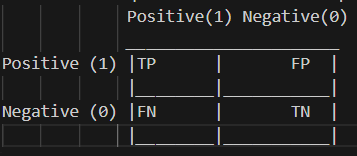

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, svc.predict(test_x_vector), labels=['positive', 'negative'])

# La suma se todos los elementos es el universo de valores

array([[295,  40],
       [ 63, 262]])

#  Optimizacion del Modelo

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# se usa para hacer una busqueda exahustiva de los mejores valores para optimizar el modelo, es decir, se le pueden ingresar diferentes valores para los parametros del modelo y el va a evaluar cual es el mejor valor para cada parametro y va a entregar el mejor modelo con esos parametros optimos
paremetros = {'C':[1,4,8,16,32], 'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc, paremetros, cv=5) # cv=5 -> validaciones cruzadas
svc_grid.fit(train_x_vector, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [26]:
print(svc_grid.best_estimator_)
print(svc_grid.best_params_)

SVC(C=1, kernel='linear')
{'C': 1, 'kernel': 'linear'}


In [25]:
svc_grid.best_score_

np.float64(0.8246268656716419)